Features used for clustering are coefficient, fit_score (r^2), and intercept.

Cluster algorithms: K-mean, Agglomerative linkage with ward, HDBSCAN.

Simulate data set enclosed in a class.

In [1]:

import pandas as pd
import numpy as np
from data.simulation import dgf10, dgf11, plot_line, gd2df, add_noise, TimeSeries

from data.simulation import make_dataset_linear, make_dataset_exponential

In [2]:
SIM_DAYS = 1200  # 200 history + 250 + 3*250
dataset = {} # to store dataset

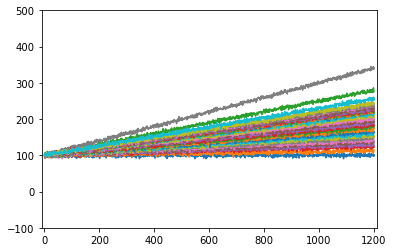

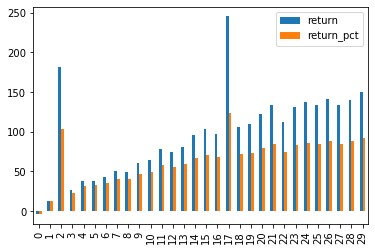

In [3]:
dataset, df_stat_linear = make_dataset_linear(dataset)

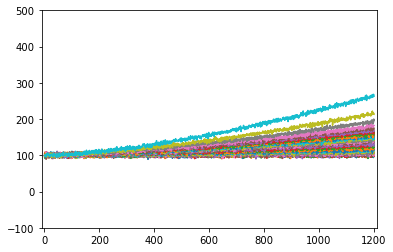

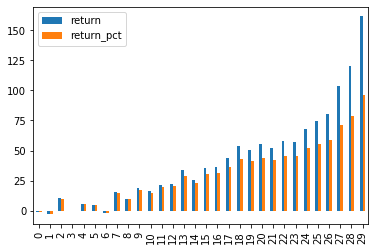

In [4]:
dataset, df_stat_growth = make_dataset_exponential(dataset)

In [5]:
len(dataset) # Size of data set

60

In [6]:
dataset.keys()

dict_keys(['linear_1', 'linear_2', 'linear_3', 'linear_4', 'linear_5', 'linear_6', 'linear_7', 'linear_8', 'linear_9', 'linear_10', 'linear_11', 'linear_12', 'linear_13', 'linear_14', 'linear_15', 'linear_16', 'linear_17', 'linear_18', 'linear_19', 'linear_20', 'linear_21', 'linear_22', 'linear_23', 'linear_24', 'linear_25', 'linear_26', 'linear_27', 'linear_28', 'linear_29', 'linear_30', 'growth_1', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12', 'growth_13', 'growth_14', 'growth_15', 'growth_16', 'growth_17', 'growth_18', 'growth_19', 'growth_20', 'growth_21', 'growth_22', 'growth_23', 'growth_24', 'growth_25', 'growth_26', 'growth_27', 'growth_28', 'growth_29', 'growth_30'])

In [7]:
# Check single series
generator_func = dataset['growth_11'][0]
data = dataset['growth_11'][1] # in data frame format
values = data[['y']]
values.rename(columns={'y':'growth_11'})

growth_11
1      98.956733
2      96.749621
3     107.470832
4     101.711970
5     100.734167
...          ...
1196  118.950740
1197  115.490710
1198  116.291668
1199  118.952394
1200  114.925791

[1200 rows x 1 columns]

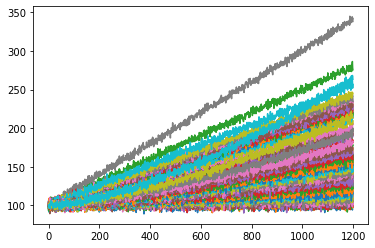

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for k, v in dataset.items():
    data = v[1][['y']].values # get y from data frame
    plt.plot(data)


In [9]:
# Plot with Pandas
series = []
for k, v in dataset.items():
    # k is series ID
    data = v
    generator_func = data[0]
    values = data[1][['y']]
    values.rename(columns={'y':k}, inplace=True)
    series.append(values)
    
# pd.concat(series, axis=0)
# was getting NaN
# https://stackoverflow.com/questions/40339886/pandas-concat-generates-nan-values
df_sim = pd.concat(series, axis=1, sort=False)
df_sim

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


linear_1    linear_2    linear_3    linear_4    linear_5    linear_6  \
1     105.149034  101.195633   97.745379   99.911339   97.399476   99.417720   
2      98.647741  104.967151   95.817449   99.792018  101.142855   99.799738   
3     100.443788   91.796480   99.605430   97.765478  100.923797  102.647104   
4      98.630447  104.757186   95.290586  101.438897  101.577267  103.463910   
5      98.685933   96.191088  100.650385   97.277042  103.260602   98.221469   
...          ...         ...         ...         ...         ...         ...   
1196   99.610598  113.373088  279.466239  121.390593  131.618242  139.428106   
1197  100.435182  105.314060  283.956718  120.948713  129.120559  140.557129   
1198  102.017415  109.682754  286.297478  123.468171  127.340339  138.952127   
1199   97.266370  110.757094  277.995615  121.348996  128.711844  138.261584   
1200  101.161462  114.612965  275.624696  126.085348  134.071016  137.590996   

        linear_7    linear_8    linear_9   linear_10  ...   growth_21  \
1      98.741678  101.122545  102.399743  102.193032  ...   99.292265   
2      98.477441   93.949087   96.956374  103.075145  ...  100.139561   
3     100.604222  102.970740   99.155729  101.637224  ...   98.878596   
4     105.956991   98.356106  102.461384   96.027853  ...  100.899661   
5      97.185596  100.295853  101.487739  103.465244  ...  103.902701   
...          ...         ...         ...         ...  ...         ...   
1196  140.514305  146.567106  157.146067  162.010033  ...  151.380689   
1197  141.552388  152.960448  153.634626  153.332722  ...  151.670424   
1198  147.386347  150.409103  154.927427  157.189723  ...  156.011266   
1199  144.009016  148.807182  148.644921  159.217241  ...  151.074263   
1200  140.674819  151.920037  152.933490  164.019489  ...  154.331018   

       growth_22   growth_23   growth_24   growth_25   growth_26   growth_27  \
1     101.312233   98.554316  101.411776   99.408103   99.997281  101.351790   
2     106.490489   94.274990   97.350026   97.847952  102.077952   97.885243   
3      99.635904   97.078710   99.300034  101.241247  104.991469  100.284374   
4     104.267029   96.594755   94.999661  100.183015   99.543109   97.911292   
5     102.560695  101.147008   98.574926   99.621514   99.347664  107.841439   
...          ...         ...         ...         ...         ...         ...   
1196  148.104616  164.169236  159.320503  170.294958  173.419767  180.634441   
1197  156.084800  164.013887  167.021723  170.130471  173.127593  178.661238   
1198  154.420648  158.407956  170.471743  170.569233  172.419571  180.252979   
1199  159.181309  166.047395  164.471756  170.151845  171.124341  183.173139   
1200  154.001286  155.953470  159.448638  166.840452  174.796223  182.422702   

       growth_28   growth_29   growth_30  
1      96.407215   96.995328  100.647798  
2     101.041971  102.390193   97.990887  
3     102.158152   99.291852   99.524954  
4     102.247589  100.543532   96.577897  
5     100.758874   99.448882  101.051642  
...          ...         ...         ...  
1196  186.407282  215.728681  260.949360  
1197  190.442970  215.147881  263.808769  
1198  190.523340  217.279910  268.248652  
1199  200.068847  213.308260  267.085970  
1200  196.000191  213.202758  262.975218  

[1200 rows x 60 columns]

<Figure size 1440x1152 with 0 Axes>

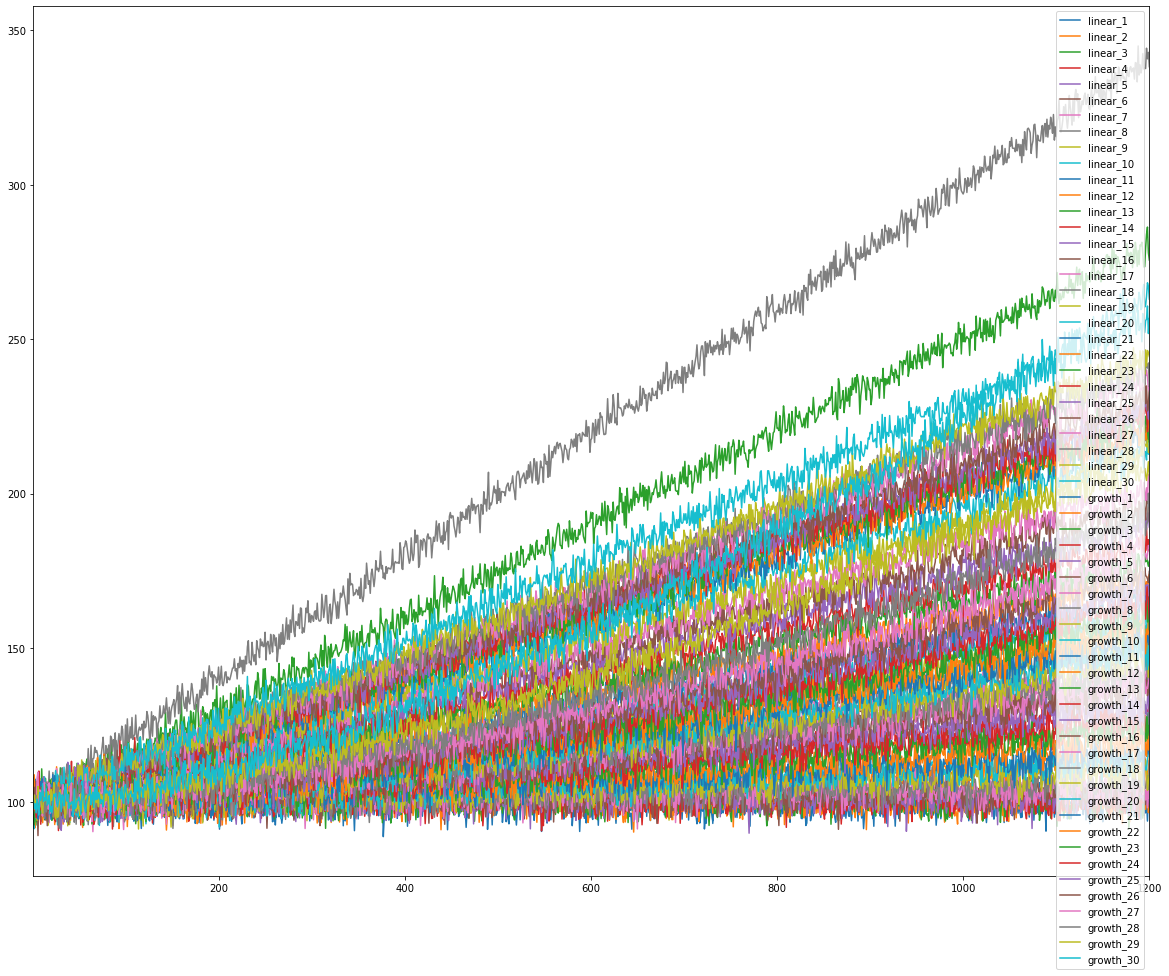

In [10]:
plt.figure(figsize=(20,16))
df_sim.plot(figsize=(20,16))

We have data representation in Pandas DataFrame and numpy.

In [11]:
# Numpy data
data = dataset['growth_1'][1][['y']].values
data

array([[ 98.45525108],
       [108.09025261],
       [ 96.5504896 ],
       ...,
       [ 93.93293082],
       [102.57631588],
       [ 97.82307439]])

In [12]:
data.shape

(1200, 1)

In [13]:
# Fit linear regression to this individual series.
#
#  https://scikit-learn.org/stable/modules/linear_model.html
# Linear Model is linear combination of features.

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

# fit(X, y)

LinearRegression()

In [14]:
reg.coef_  # the w_0 is intercept.

array([0.5, 0.5])

In [15]:
data[:, np.newaxis].shape # 
X_train = data
X_train

array([[ 98.45525108],
       [108.09025261],
       [ 96.5504896 ],
       ...,
       [ 93.93293082],
       [102.57631588],
       [ 97.82307439]])

In [16]:
from sklearn import datasets, linear_model

In [17]:
t = dataset['growth_23'][1].index.values
t

array([   1,    2,    3, ..., 1198, 1199, 1200])

In [18]:
def fit_trend(data, series_id="", plot=True):
    """Data is np.array. From RegressionLineSlope notebook. Here it looks like we convert data to X and Y planar."""
    X_train = np.array([[i] for i in range(np.shape(data)[0])]) # Single parameter value
    y_train = data
    ndays = len(y_train)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Model parameter
    fit_score, coef, intercept = regr.score(X_train, y_train), regr.coef_, regr.intercept_
    
    # Show plot
    if plot:    
        # Plot simple line
        x = np.linspace(0, len(data)) # See https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html
        y = (regr.coef_[0] * x) + data[0]
        fig = plt.figure()
        ax = plt.axes()
        ax.scatter(X_train, y_train,  color='black')
        ax.plot(x, y, color='blue')
        plt.title("Scatter Plot of %s and Fitted Trend Line During a Time Window: n=%d Coeff[0]=%0.2f Intercept=%0.2f" % (series_id, ndays, coef[0], intercept))
        plt.show()

    # Return. Slope is coefficient:  y = a*X + c
    return {"fit_score":fit_score, "coef":coef[0][0], "intercept":intercept[0]}

# Test fit trend function
# Numpy data
# data = dataset['growth_1'][1][['y']].values
# fit_trend(data)   

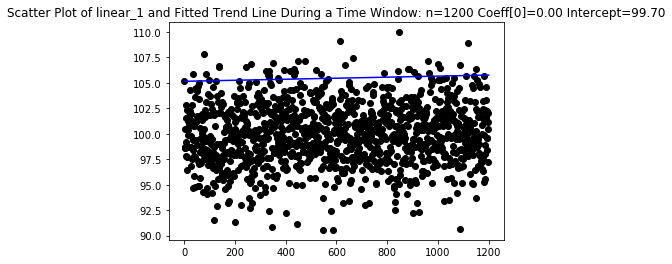

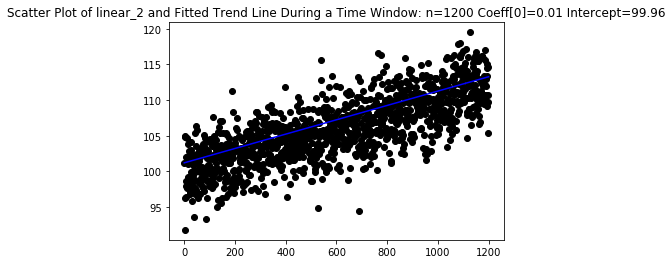

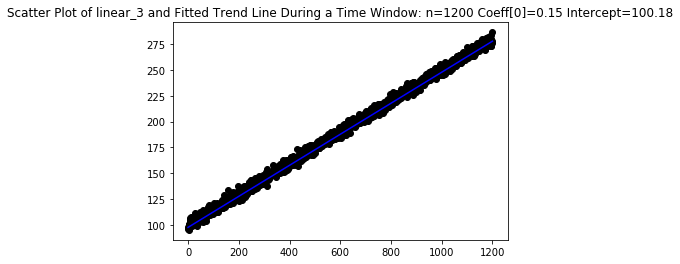

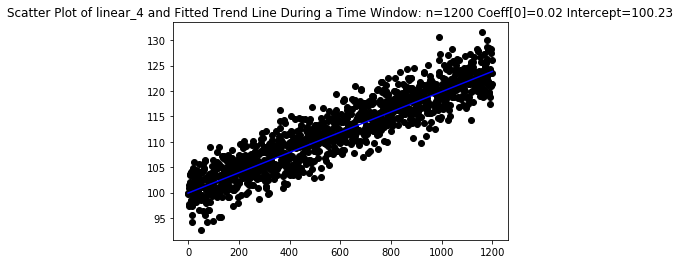

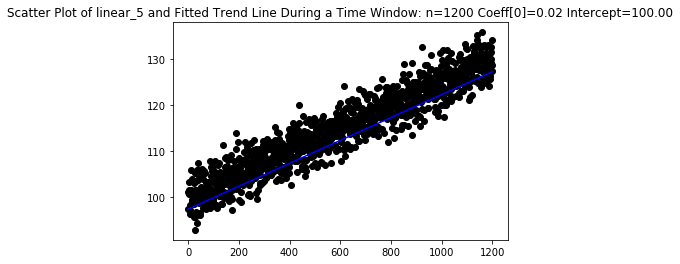

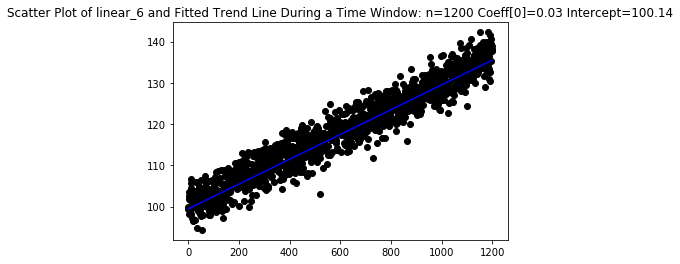

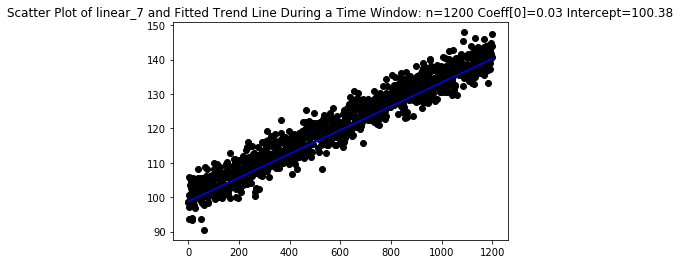

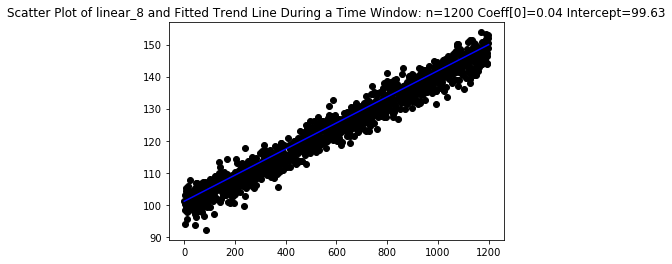

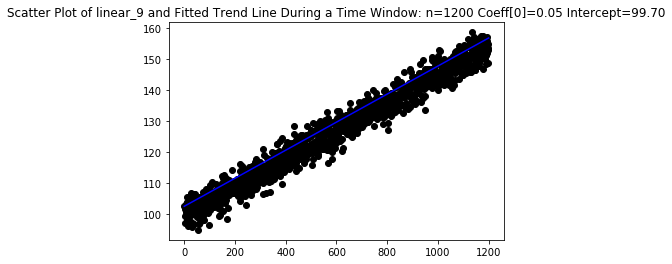

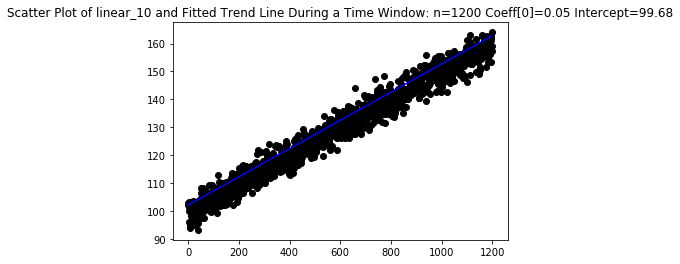

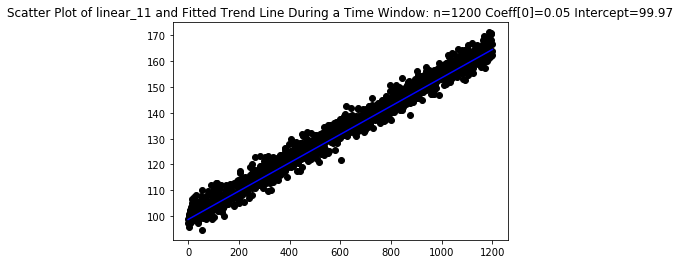

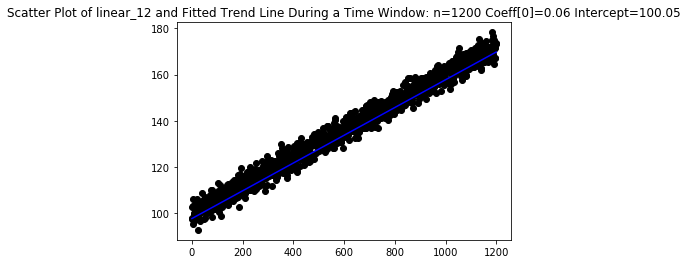

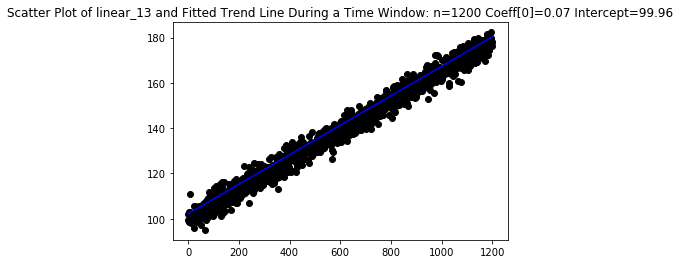

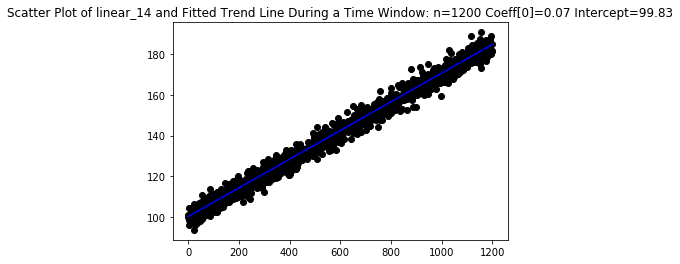

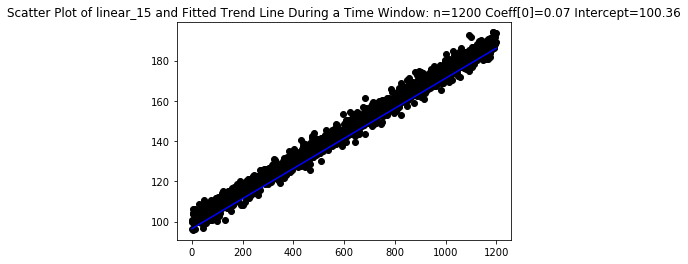

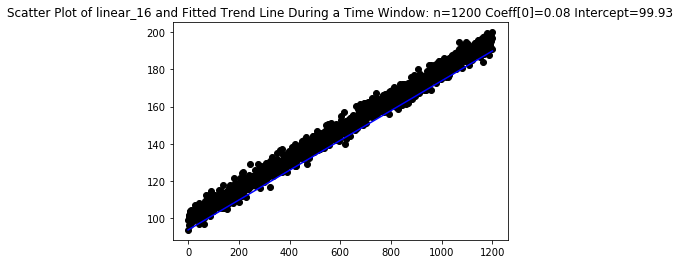

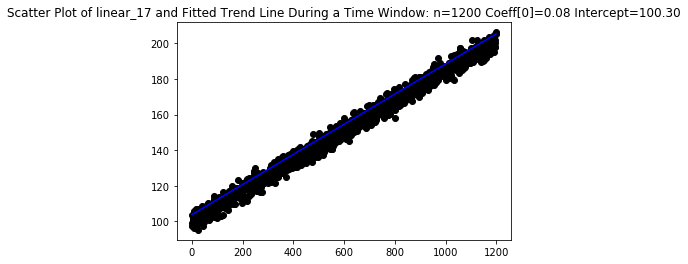

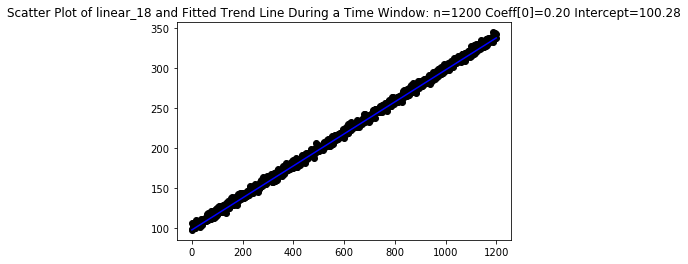

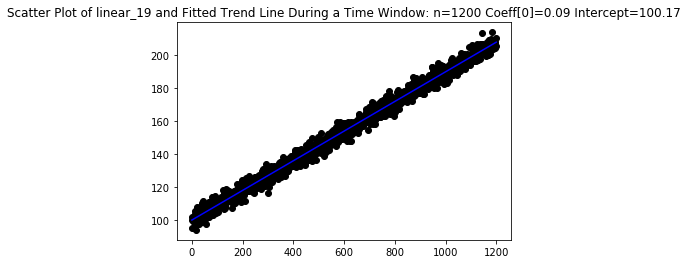

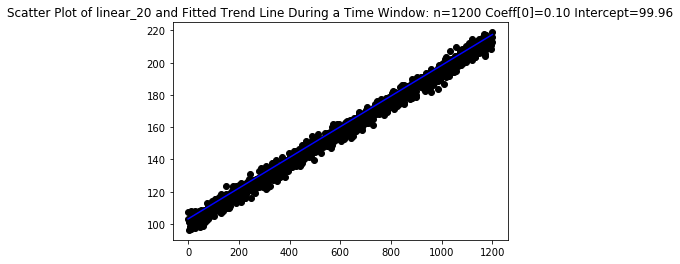

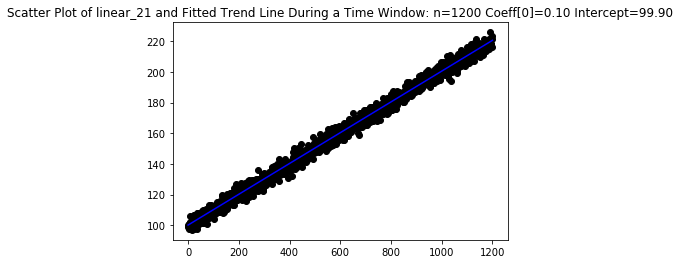

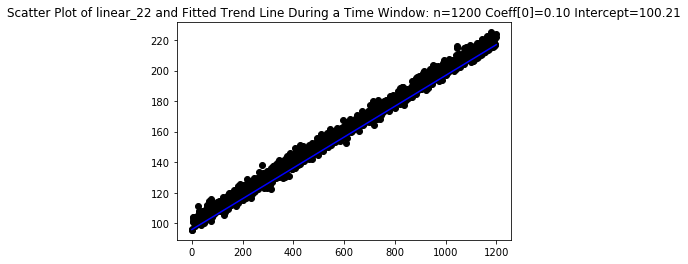

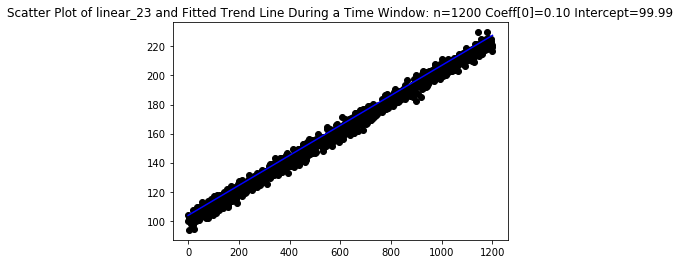

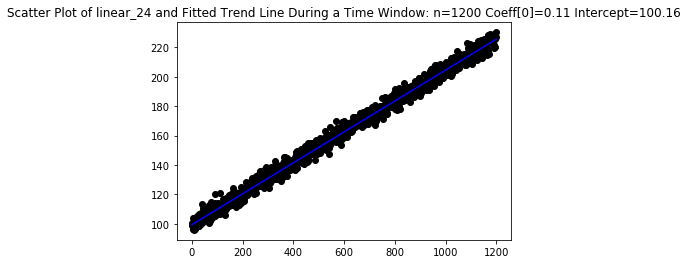

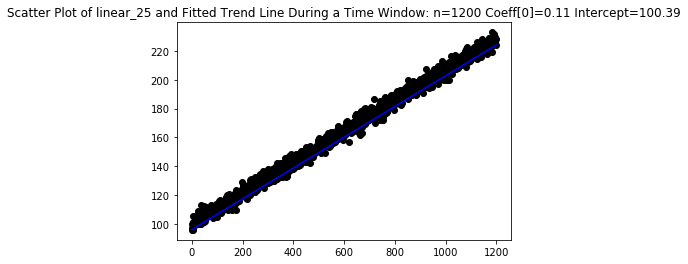

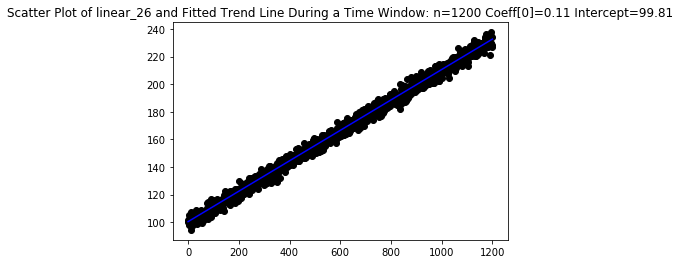

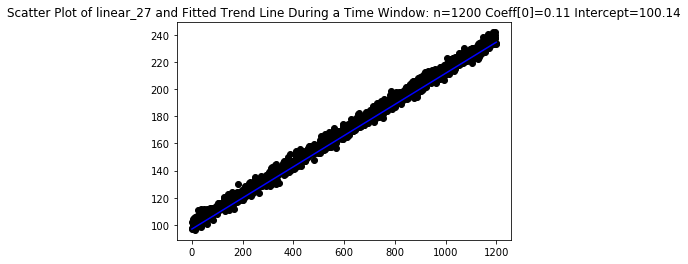

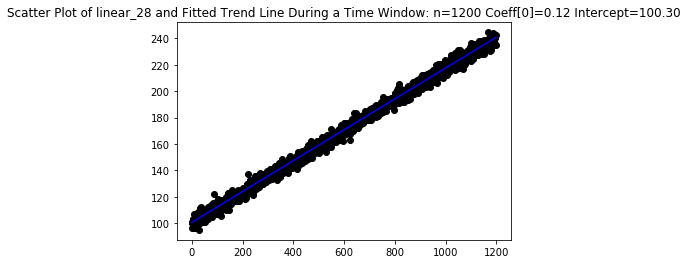

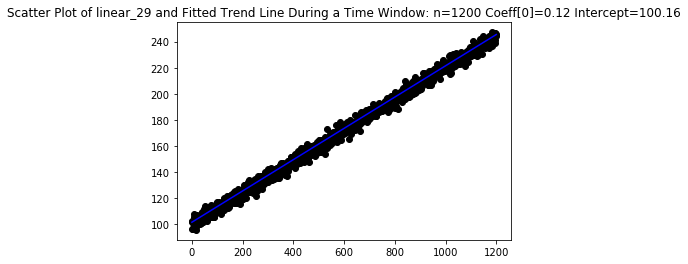

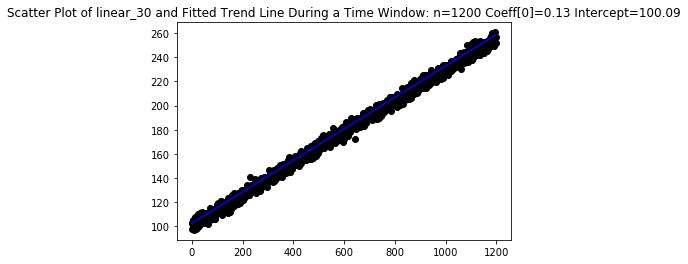

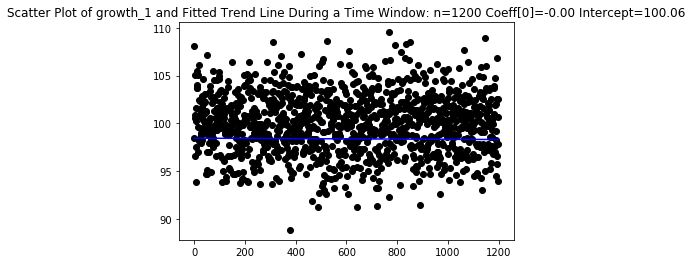

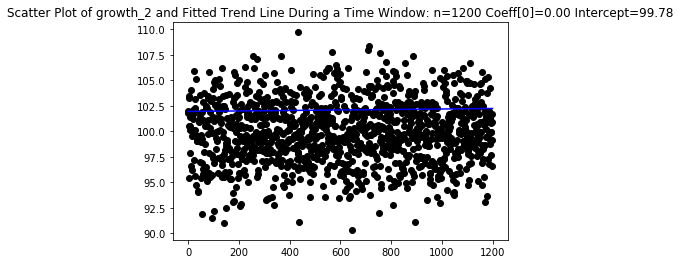

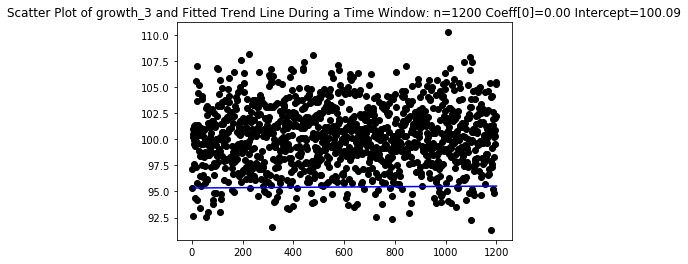

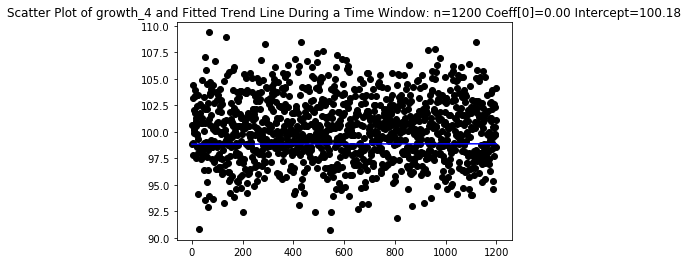

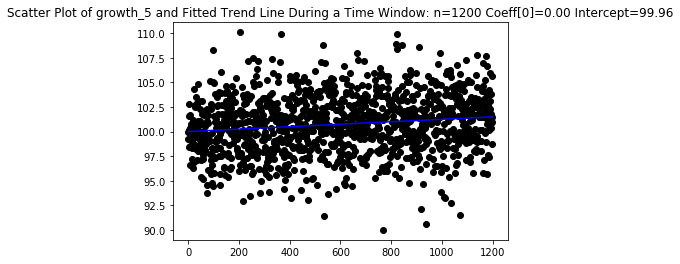

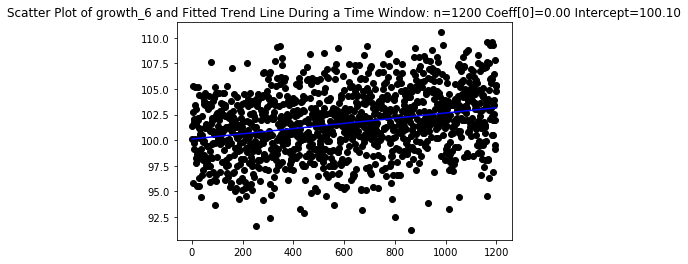

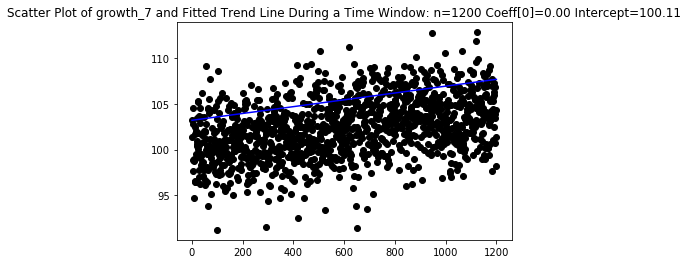

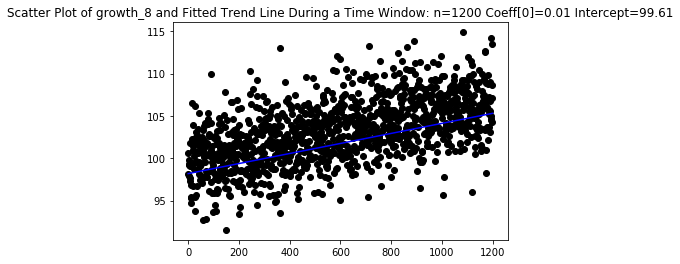

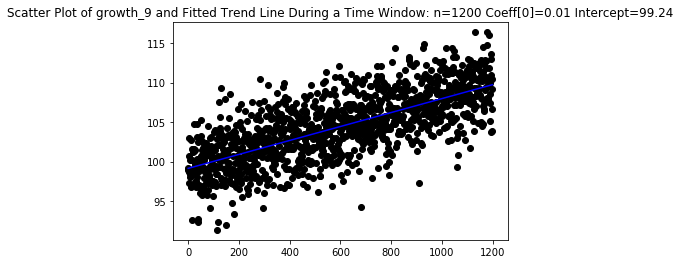

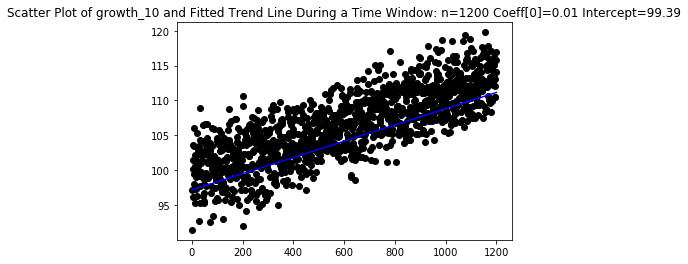

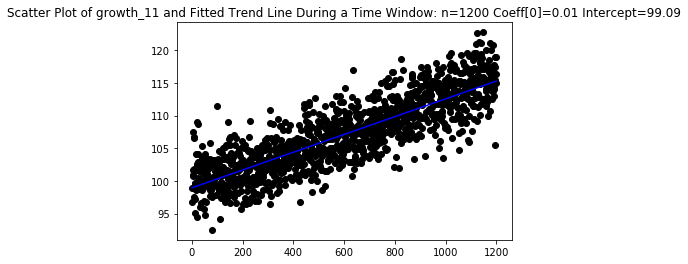

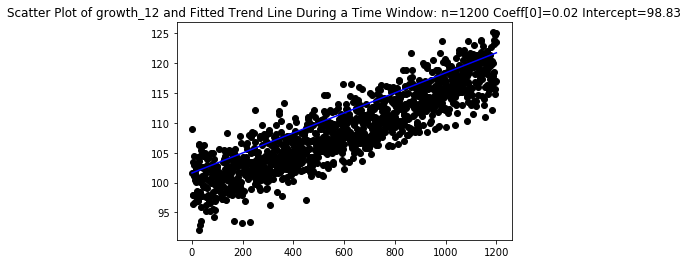

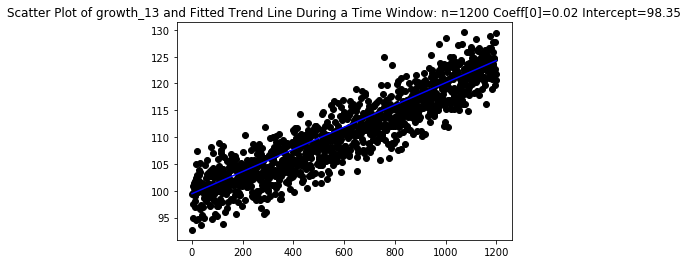

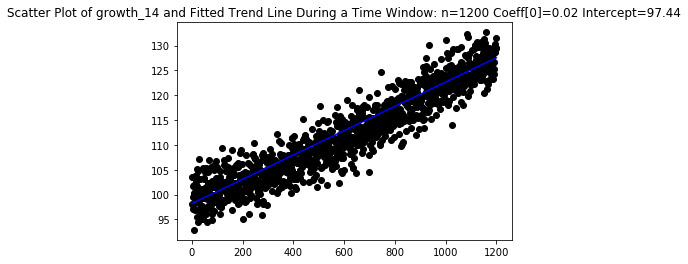

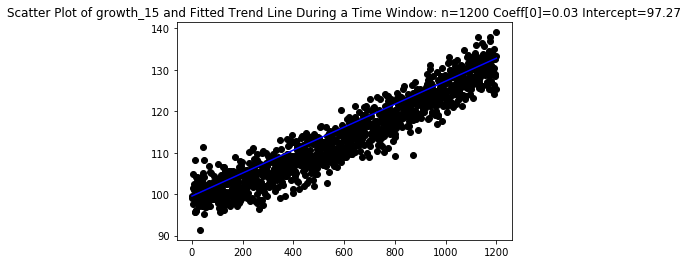

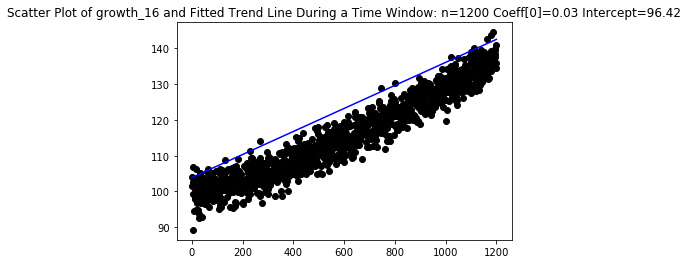

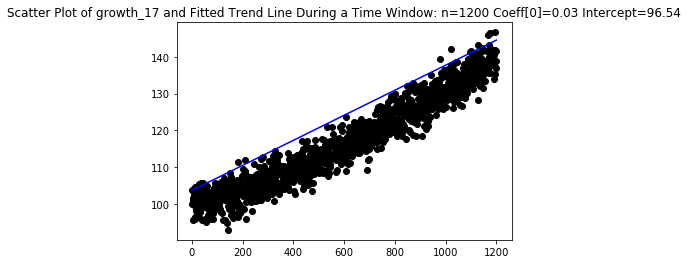

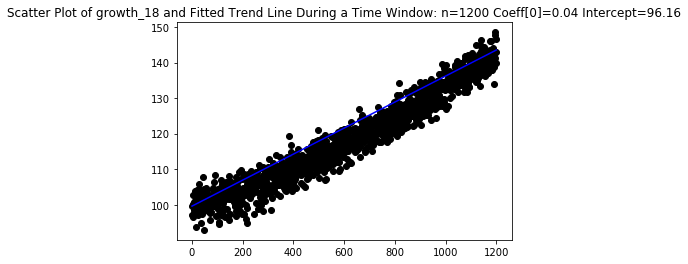

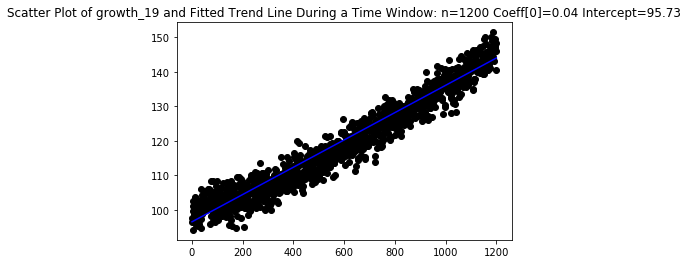

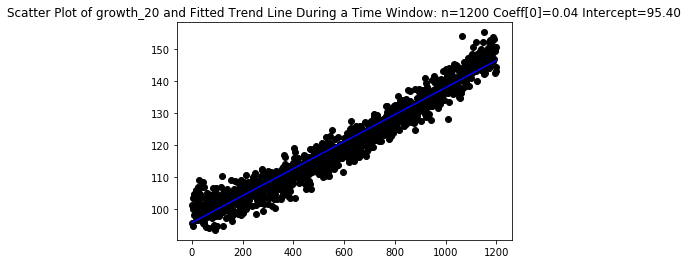

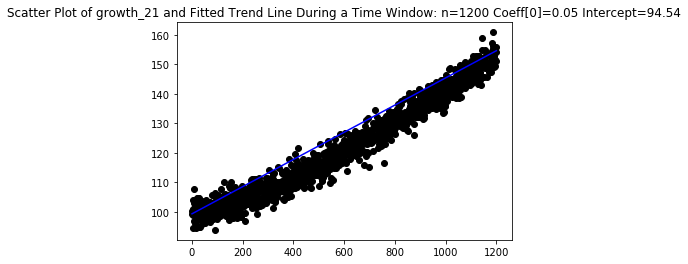

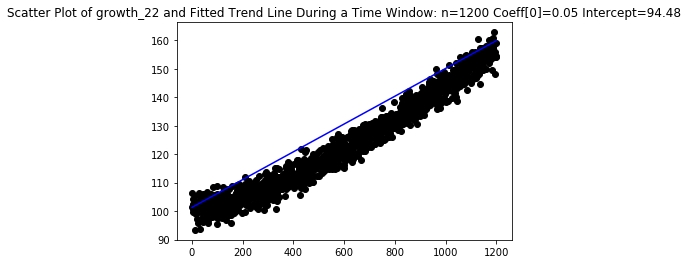

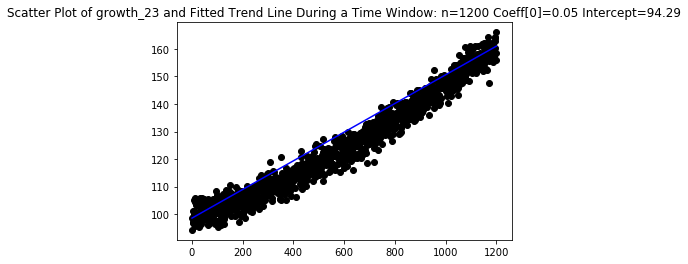

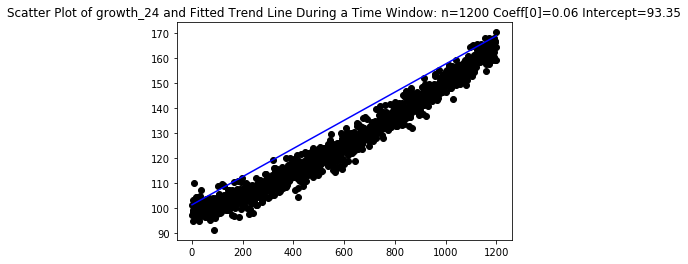

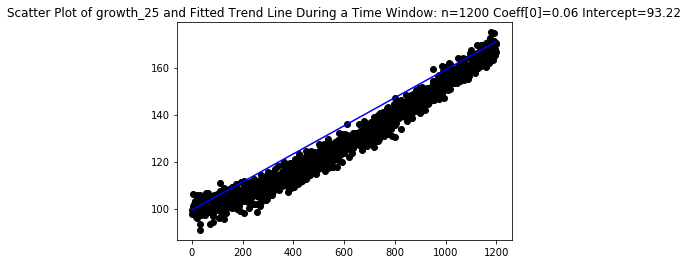

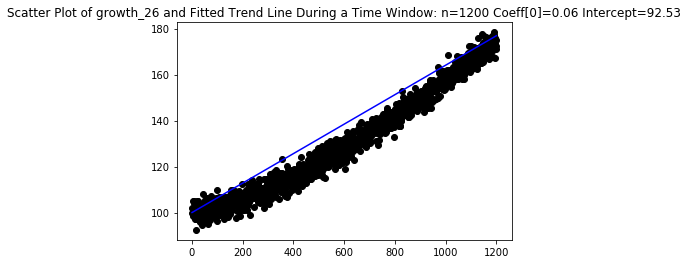

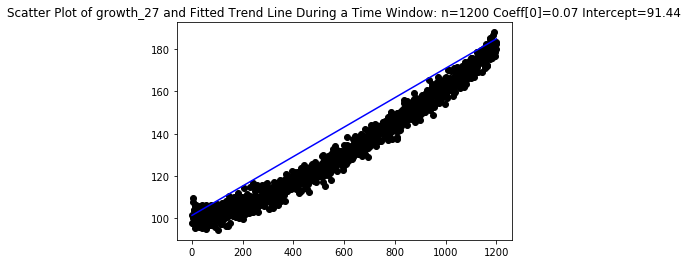

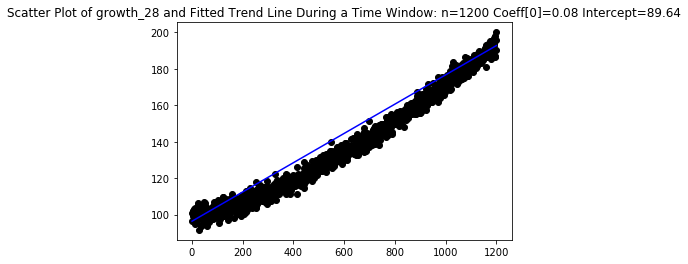

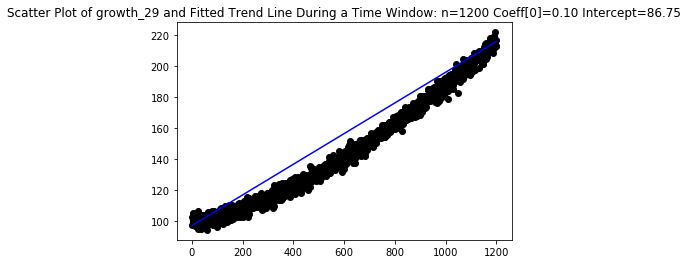

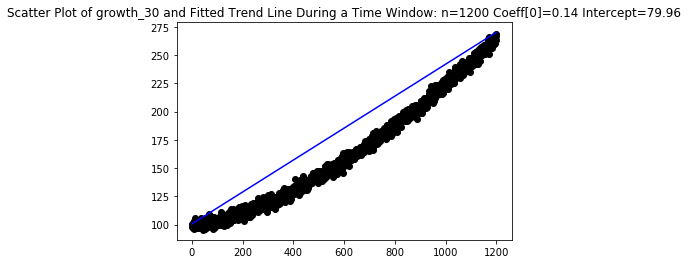

In [19]:
df_grouping_features = pd.DataFrame()

for k, v in dataset.items():
    # k is series ID
    data = v
    generator_func = data[0]
    values = data[1][['y']].values
    result = fit_trend(values, series_id = k)
    result['generator_func'] = generator_func
    result['series_id'] = k
    result['mean'] = np.mean(values)
    result['variance'] = np.std(values)
    df_grouping_features = df_grouping_features.append(result, ignore_index=True)
    

In [20]:
df_grouping_features

coef  fit_score generator_func   intercept        mean  series_id  \
0   0.000508   0.003401          dgf10   99.696228  100.000625   linear_1   
1   0.010062   0.584961          dgf10   99.955465  105.987889   linear_2   
2   0.149933   0.996888          dgf10  100.176429  190.061338   linear_3   
3   0.019942   0.849214          dgf10  100.230757  112.186189   linear_4   
4   0.024890   0.896941          dgf10   99.995226  114.916490   linear_5   
5   0.030077   0.927035          dgf10  100.144787  118.175979   linear_6   
6   0.034613   0.941581          dgf10  100.383217  121.133712   linear_7   
7   0.040695   0.959006          dgf10   99.625332  124.021927   linear_8   
8   0.045344   0.965796          dgf10   99.697000  126.881016   linear_9   
9   0.050472   0.970405          dgf10   99.676938  129.935023  linear_10   
10  0.054921   0.976978          dgf10   99.972973  132.898234  linear_11   
11  0.060016   0.980562          dgf10  100.054146  136.033977  linear_12   
12  0.065160   0.982554          dgf10   99.960912  139.024183  linear_13   
13  0.070471   0.984565          dgf10   99.830622  142.077794  linear_14   
14  0.074769   0.986308          dgf10  100.362437  145.186734  linear_15   
15  0.080308   0.988269          dgf10   99.927384  148.071758  linear_16   
16  0.084647   0.989388          dgf10  100.300752  151.046903  linear_17   
17  0.199939   0.998344          dgf10  100.280659  220.144242  linear_18   
18  0.089832   0.990282          dgf10  100.171957  154.026073  linear_19   
19  0.095249   0.991863          dgf10   99.963075  157.064811  linear_20   
20  0.100222   0.992729          dgf10   99.896160  159.979350  linear_21   
21  0.100901   0.992890          dgf10  100.211664  160.701513  linear_22   
22  0.103289   0.992864          dgf10   99.994364  161.916275  linear_23   
23  0.105043   0.992725          dgf10  100.164335  163.137446  linear_24   
24  0.106631   0.993805          dgf10  100.386306  164.311691  linear_25   
25  0.110336   0.993532          dgf10   99.808713  165.955366  linear_26   
26  0.114904   0.994610          dgf10  100.139057  169.023837  linear_27   
27  0.116704   0.994411          dgf10  100.304760  170.268986  linear_28   
28  0.119903   0.995037          dgf10  100.160209  172.042287  linear_29   
29  0.130123   0.995641          dgf10  100.090984  178.099529  linear_30   
30 -0.000118   0.000172          dgf11  100.062477   99.992033   growth_1   
31  0.000240   0.000746          dgf11   99.778810   99.922822   growth_2   
32  0.000155   0.000313          dgf11  100.094072  100.187163   growth_3   
33  0.000029   0.000011          dgf11  100.178022  100.195173   growth_4   
34  0.001251   0.021698          dgf11   99.959208  100.709324   growth_5   
35  0.002539   0.075614          dgf11  100.103487  101.625758   growth_6   
36  0.003745   0.158080          dgf11  100.110441  102.355522   growth_7   
37  0.005931   0.305924          dgf11   99.606085  103.161696   growth_8   
38  0.008832   0.507186          dgf11   99.235208  104.530052   growth_9   
39  0.011632   0.624540          dgf11   99.390391  106.363624  growth_10   
40  0.013589   0.706233          dgf11   99.092224  107.238845  growth_11   
41  0.016779   0.796091          dgf11   98.827162  108.886425  growth_12   
42  0.020679   0.846198          dgf11   98.351405  110.748746  growth_13   
43  0.024440   0.887268          dgf11   97.443142  112.094739  growth_14   
44  0.027708   0.899393          dgf11   97.265729  113.876546  growth_15   
45  0.032207   0.921230          dgf11   96.419950  115.727824  growth_16   
46  0.034053   0.925501          dgf11   96.543056  116.957998  growth_17   
47  0.036598   0.939418          dgf11   96.164727  118.105068  growth_18   
48  0.039571   0.943370          dgf11   95.733263  119.455836  growth_19   
49  0.042209   0.947625          dgf11   95.399679  120.703815  growth_20   
50  0.046148   0.955479          dgf11   94.541836  122.207411  growth_21   
51  

# Cluster the Trend Coefficients

In [21]:
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D



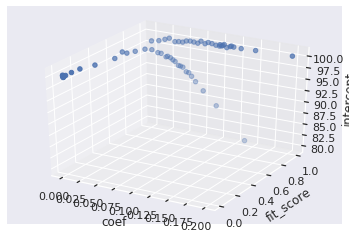

In [23]:
sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x_data = pd.to_numeric(df_grouping_features['coef'])
y_data = pd.to_numeric(df_grouping_features['fit_score']) 
z_data = pd.to_numeric(df_grouping_features['intercept'])

ax.set_xlabel("coef")
ax.set_ylabel("fit_score")
ax.set_zlabel("intercept")

ax.scatter(x_data, y_data, z_data)
plt.show()

# Find optimal number of clusters

Text(0, 0.5, 'Inertia')

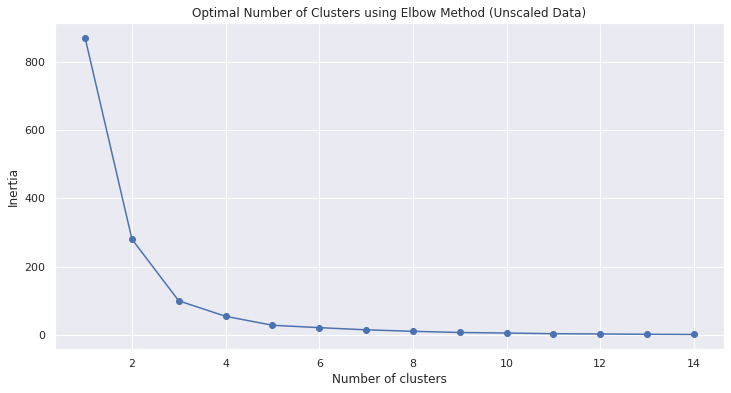

In [24]:
# 2. KMeans on Original Dataset

# Find elbow (Unscaled)
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(df_grouping_features[['coef','fit_score','intercept']].values)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Unscaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


In [76]:
# Looks like 3
kmean1 = KMeans(n_clusters=3, random_state=0)
kmean1.fit(df_scale)


KMeans(n_clusters=3, random_state=0)

Text(0, 0.5, 'Inertia')

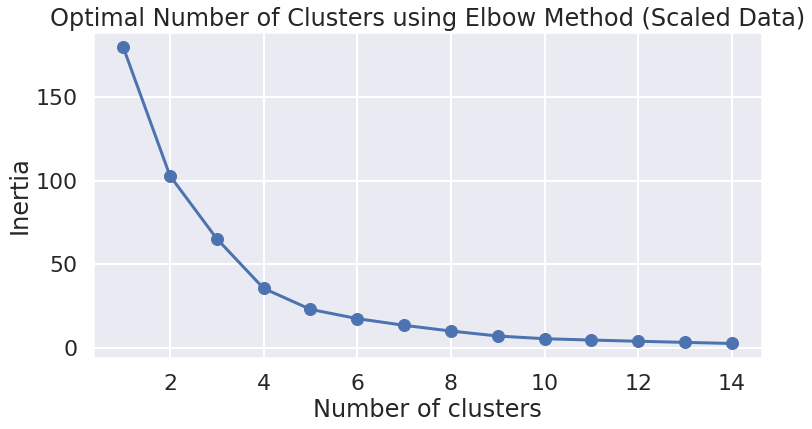

In [77]:


# 2. KMeans on Original Dataset
sc = StandardScaler()
df_feature = df_grouping_features[['coef','fit_score','intercept']]
df_scale = sc.fit_transform(df_feature)



# Find elbow
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(df_scale)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [49]:

kmean2 = KMeans(n_clusters=4, random_state=0)
kmean2.fit(df_grouping_features[['coef','fit_score','intercept']].values)

kmean2.cluster_centers_
# kmean.labels_
df_grouping_features['k-mean'] = kmean1.labels_
df_grouping_features['k-mean_unscaled'] = kmean2.labels_
df_grouping_features

coef  fit_score generator_func   intercept        mean  series_id  \
0   0.000508   0.003401          dgf10   99.696228  100.000625   linear_1   
1   0.010062   0.584961          dgf10   99.955465  105.987889   linear_2   
2   0.149933   0.996888          dgf10  100.176429  190.061338   linear_3   
3   0.019942   0.849214          dgf10  100.230757  112.186189   linear_4   
4   0.024890   0.896941          dgf10   99.995226  114.916490   linear_5   
5   0.030077   0.927035          dgf10  100.144787  118.175979   linear_6   
6   0.034613   0.941581          dgf10  100.383217  121.133712   linear_7   
7   0.040695   0.959006          dgf10   99.625332  124.021927   linear_8   
8   0.045344   0.965796          dgf10   99.697000  126.881016   linear_9   
9   0.050472   0.970405          dgf10   99.676938  129.935023  linear_10   
10  0.054921   0.976978          dgf10   99.972973  132.898234  linear_11   
11  0.060016   0.980562          dgf10  100.054146  136.033977  linear_12   
12  0.065160   0.982554          dgf10   99.960912  139.024183  linear_13   
13  0.070471   0.984565          dgf10   99.830622  142.077794  linear_14   
14  0.074769   0.986308          dgf10  100.362437  145.186734  linear_15   
15  0.080308   0.988269          dgf10   99.927384  148.071758  linear_16   
16  0.084647   0.989388          dgf10  100.300752  151.046903  linear_17   
17  0.199939   0.998344          dgf10  100.280659  220.144242  linear_18   
18  0.089832   0.990282          dgf10  100.171957  154.026073  linear_19   
19  0.095249   0.991863          dgf10   99.963075  157.064811  linear_20   
20  0.100222   0.992729          dgf10   99.896160  159.979350  linear_21   
21  0.100901   0.992890          dgf10  100.211664  160.701513  linear_22   
22  0.103289   0.992864          dgf10   99.994364  161.916275  linear_23   
23  0.105043   0.992725          dgf10  100.164335  163.137446  linear_24   
24  0.106631   0.993805          dgf10  100.386306  164.311691  linear_25   
25  0.110336   0.993532          dgf10   99.808713  165.955366  linear_26   
26  0.114904   0.994610          dgf10  100.139057  169.023837  linear_27   
27  0.116704   0.994411          dgf10  100.304760  170.268986  linear_28   
28  0.119903   0.995037          dgf10  100.160209  172.042287  linear_29   
29  0.130123   0.995641          dgf10  100.090984  178.099529  linear_30   
30 -0.000118   0.000172          dgf11  100.062477   99.992033   growth_1   
31  0.000240   0.000746          dgf11   99.778810   99.922822   growth_2   
32  0.000155   0.000313          dgf11  100.094072  100.187163   growth_3   
33  0.000029   0.000011          dgf11  100.178022  100.195173   growth_4   
34  0.001251   0.021698          dgf11   99.959208  100.709324   growth_5   
35  0.002539   0.075614          dgf11  100.103487  101.625758   growth_6   
36  0.003745   0.158080          dgf11  100.110441  102.355522   growth_7   
37  0.005931   0.305924          dgf11   99.606085  103.161696   growth_8   
38  0.008832   0.507186          dgf11   99.235208  104.530052   growth_9   
39  0.011632   0.624540          dgf11   99.390391  106.363624  growth_10   
40  0.013589   0.706233          dgf11   99.092224  107.238845  growth_11   
41  0.016779   0.796091          dgf11   98.827162  108.886425  growth_12   
42  0.020679   0.846198          dgf11   98.351405  110.748746  growth_13   
43  0.024440   0.887268          dgf11   97.443142  112.094739  growth_14   
44  0.027708   0.899393          dgf11   97.265729  113.876546  growth_15   
45  0.032207   0.921230          dgf11   96.419950  115.727824  growth_16   
46  0.034053   0.925501          dgf11   96.543056  116.957998  growth_17   
47  0.036598   0.939418          dgf11   96.164727  118.105068  growth_18   
48  0.039571   0.943370          dgf11   95.733263  119.455836  growth_19   
49  0.042209   0.947625          dgf11   95.399679  120.703815  growth_20   
50  0.046148   0.955479          dgf11   94.541836  122.207411  growth_21   
51  

In [50]:
# Need to find average return of the group.

cluster_res =  df_grouping_features[['k-mean', 'k-mean_unscaled', 'coef', 'fit_score', 'intercept', 'series_id']]
# cluster_res

In [51]:
# bring the stats from simulation so can check clustering answer
g_stat = df_stat_linear.append(df_stat_growth, ignore_index=True, sort=False)
# g_stat

In [52]:
df_output = cluster_res.merge(g_stat)
# df_output = df_output.merge(df_grouping_features)
df_output

k-mean  k-mean_unscaled      coef  fit_score   intercept  series_id  \
0        1                0  0.000508   0.003401   99.696228   linear_1   
1        1                0  0.010062   0.584961   99.955465   linear_2   
2        0                0  0.149933   0.996888  100.176429   linear_3   
3        0                0  0.019942   0.849214  100.230757   linear_4   
4        0                0  0.024890   0.896941   99.995226   linear_5   
5        0                0  0.030077   0.927035  100.144787   linear_6   
6        0                0  0.034613   0.941581  100.383217   linear_7   
7        0                0  0.040695   0.959006   99.625332   linear_8   
8        0                0  0.045344   0.965796   99.697000   linear_9   
9        0                0  0.050472   0.970405   99.676938  linear_10   
10       0                0  0.054921   0.976978   99.972973  linear_11   
11       0                0  0.060016   0.980562  100.054146  linear_12   
12       0                0  0.065160   0.982554   99.960912  linear_13   
13       0                0  0.070471   0.984565   99.830622  linear_14   
14       0                0  0.074769   0.986308  100.362437  linear_15   
15       0                0  0.080308   0.988269   99.927384  linear_16   
16       0                0  0.084647   0.989388  100.300752  linear_17   
17       0                0  0.199939   0.998344  100.280659  linear_18   
18       0                0  0.089832   0.990282  100.171957  linear_19   
19       0                0  0.095249   0.991863   99.963075  linear_20   
20       0                0  0.100222   0.992729   99.896160  linear_21   
21       0                0  0.100901   0.992890  100.211664  linear_22   
22       0                0  0.103289   0.992864   99.994364  linear_23   
23       0                0  0.105043   0.992725  100.164335  linear_24   
24       0                0  0.106631   0.993805  100.386306  linear_25   
25       0                0  0.110336   0.993532   99.808713  linear_26   
26       0                0  0.114904   0.994610  100.139057  linear_27   
27       0                0  0.116704   0.994411  100.304760  linear_28   
28       0                0  0.119903   0.995037  100.160209  linear_29   
29       0                0  0.130123   0.995641  100.090984  linear_30   
30       1                0 -0.000118   0.000172  100.062477   growth_1   
31       1                0  0.000240   0.000746   99.778810   growth_2   
32       1                0  0.000155   0.000313  100.094072   growth_3   
33       1                0  0.000029   0.000011  100.178022   growth_4   
34       1                0  0.001251   0.021698   99.959208   growth_5   
35       1                0  0.002539   0.075614  100.103487   growth_6   
36       1                0  0.003745   0.158080  100.110441   growth_7   
37       1                0  0.005931   0.305924   99.606085   growth_8   
38       1                0  0.008832   0.507186   99.235208   growth_9   
39       1                0  0.011632   0.624540   99.390391  growth_10   
40       0                0  0.013589   0.706233   99.092224  growth_11   
41       0                0  0.016779   0.796091   98.827162  growth_12   
42       0                0  0.020679   0.846198   98.351405  growth_13   
43       0                2  0.024440   0.887268   97.443142  growth_14   
44       0                2  0.027708   0.899393   97.265729  growth_15   
45       0                2  0.032207   0.921230   96.419950  growth_16   
46       0                2  0.034053   0.925501   96.543056  growth_17   
47       0                2  0.036598   0.939418   96.164727  growth_18   
48       0                2  0.039571   0.943370   95.733263  growth_19   
49       0                2  0.042209   0.947625   95.399679  growth_20   
50       2                2  0.046148   0.955479   94.541836  growth_21   
51       2                2  0.048853   0.956348   94.477352  growth_22   
52       2                2  

# Visualize

In [53]:
from sklearn.decomposition import PCA
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



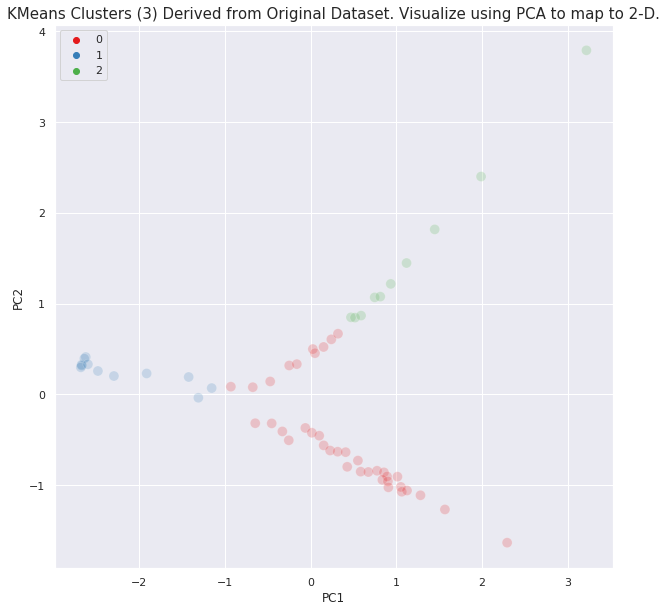

In [54]:
pca2 = PCA(n_components=3).fit(df_scale)
pca2d = pca2.transform(df_scale)
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=kmean1.labels_, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (3) Derived from Original Dataset. Visualize using PCA to map to 2-D.', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [60]:
# 3D View of PCA

Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
labels = kmean2.labels_

# df_output[['coef', 'fit_score', 'slope']]
fet = df_feature.values
trace = go.Scatter3d(x=pca2d[:,0], y=pca2d[:,1], z=pca2d[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))

# trace = go.Scatter3d(x=pca2d[:,0], y=pca2d[:,1], z=pca2d[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 600,width = 600)
data = [trace]
title = "Cluster labels and the features"
fig = go.Figure(data = data, layout = layout)
fig.show()

In [55]:
df_feature.keys()

Index(['coef', 'fit_score', 'intercept'], dtype='object')

In [ ]:
Scene = dict(xaxis = dict(title  = 'coef'),yaxis = dict(title  = 'fit_score'),zaxis = dict(title  = 'intercept'))
labels = kmean1.labels_

# df_output[['coef', 'fit_score', 'slope']]
fet = df_feature.values
trace = go.Scatter3d(x=fet[:,0], y=fet[:,1], z=fet[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))

# trace = go.Scatter3d(x=pca2d[:,0], y=pca2d[:,1], z=pca2d[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 600,width = 600)
data = [trace]
title = "Cluster labels and the features"
fig = go.Figure(data = data, layout = layout)
fig.show()

# Check cluster with Return and Variance

In [58]:
Scene = dict(xaxis = dict(title  = 'coef'),yaxis = dict(title  = 'fit_score'),zaxis = dict(title  = 'return_annualized_pct'))
labels = kmean2.labels_  # kmean1 = unscaled  kmean2 = scaled

fet = df_output[['coef', 'fit_score', 'return_annualized_pct']].values
# fet = df_feature.values
trace = go.Scatter3d(x=fet[:,0], y=fet[:,1], z=fet[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))

# trace = go.Scatter3d(x=pca2d[:,0], y=pca2d[:,1], z=pca2d[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 600,width = 600)
data = [trace]
title = "Cluster labels and the features"
fig = go.Figure(data = data, layout = layout)
fig.show()

In [75]:
Scene = dict(xaxis = dict(title  = 'coef'),yaxis = dict(title  = 'variance'),zaxis = dict(title  = 'return_annualized_pct'))
labels = kmean2.labels_  # kmean1 = unscaled  kmean2 = scaled

fet = df_output[['coef', 'variance', 'return_annualized_pct']].values
# fet = df_feature.values
trace = go.Scatter3d(x=fet[:,0], y=fet[:,1], z=fet[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))

# trace = go.Scatter3d(x=pca2d[:,0], y=pca2d[:,1], z=pca2d[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 600,width = 600)
data = [trace]
title = "Cluster labels and the features"
fig = go.Figure(data = data, layout = layout)
fig.show()

# Compare several clustering algorithms

In [63]:
# https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

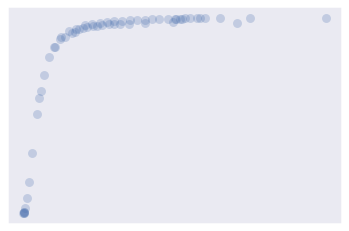

In [67]:
data = df_scale # scaled feature as data

plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

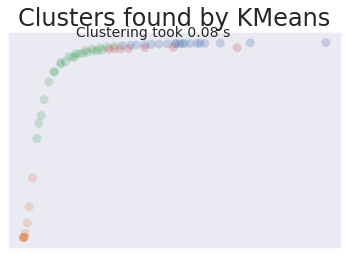

In [65]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4})

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:154: FutureWarning:

'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.



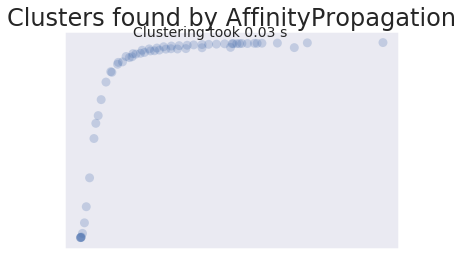

In [66]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning:

Pass bandwidth=0.175 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



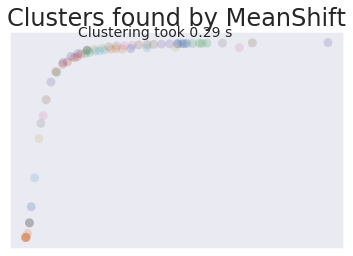

In [68]:
plot_clusters(data, cluster.MeanShift, (0.175,), {'cluster_all':False})

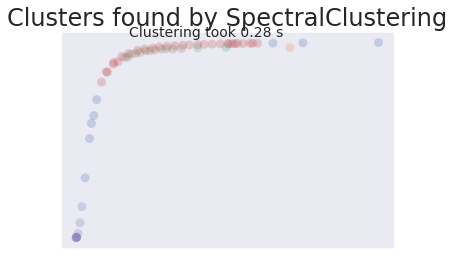

In [69]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})

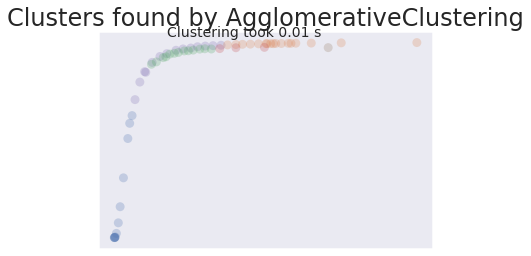

In [70]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

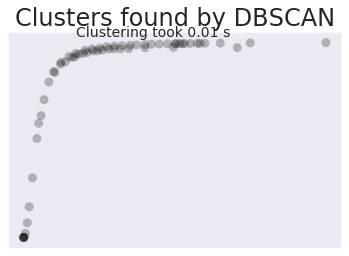

In [71]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

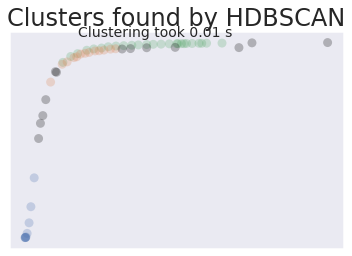

In [72]:
import hdbscan
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':5})
